# Подключение библиотек

In [1]:
using PyCall
np = pyimport("numpy")
using DifferentialEquations
using DynamicalSystems
using PyPlot
using DiffEqCallbacks
using ForwardDiff
using Latexify, LaTeXStrings, SymEngine
using LinearAlgebra

# Импорт вспомогательных методов

In [3]:
include("..\\Utils\\Computation_Utils.jl")
include("..\\Utils\\CallBack_Utils.jl")
#include("Utils\\YAML_Utils.jl")
#include("Utils\\Graphics_Utils.jl")
include("..\\ODEs\\BS_Uni_System.jl")

Main.BS_Uni_Sys

In [7]:
pushfirst!(PyVector(pyimport("sys")."path"), "..\\")
MU = pyimport("Utils.Matplotlib_Utils")

PyObject <module 'Utils.Matplotlib_Utils' from 'c:\\Users\\artyo\\YandexDisk\\Other\\Julia\\BS_module\\legacy\\..\\Utils\\Matplotlib_Utils.py'>

# Параметры системы и НУ

In [8]:
CoupleFuncNum = 1

if CoupleFuncNum == 1
    
    function MyCoupleFunc(x)
        return 1/(1 + exp(10*(cos(x))))
    end
    CoupleFuncName = "1_(1 + exp(10(cos(x))))"
    
elseif CoupleFuncNum == 2

    function MyCoupleFunc(x)
        return cos(x/2 + pi)
    end

    CoupleFuncName = "cos(x_2 + pi)"
    
elseif CoupleFuncNum == 3
    
    function MyCoupleFunc(x)
        return -cos(x)
    end

    CoupleFuncName = "-cos(x)"
    
elseif CoupleFuncNum == 4
    
    function MyCoupleFunc(x)
        return 1-cos(x)
    end

    CoupleFuncName = "1-cos(x)"
    
end

"1_(1 + exp(10(cos(x))))"

In [9]:
a2 = pi/2
a4 = 3.24685581148453
K = 1.5789473684210527
r = K/4

Eps = 1e-7

config = Dict("a2" => a2, "a4" => a4, "K" => K, "r" => r, "Eps" => Eps)
ODESystem = BS_Uni_Sys.Get_Uni_Sys(config, MyCoupleFunc)

IC = [pi - 0.2, 0.2, 0.4,
      pi - 0.2, 0.4, 0.2]

6-element Vector{Float64}:
 2.941592653589793
 0.2
 0.4
 2.941592653589793
 0.4
 0.2

# Параметры интегратора

In [10]:
time_span = 200.0
trans_time = 1000.0

alg = "DP8()"

dt = 1e-1
abstol = 1e-13
reltol = 1e-13
maxiters = 1e10

ODEKwargs = Dict(:abstol => 1e-13, :reltol => 1e-13, :maxiters => 1e10, :dt => 1e-3)

Dict{Symbol, Float64} with 4 entries:
  :maxiters => 1.0e10
  :reltol   => 1.0e-13
  :abstol   => 1.0e-13
  :dt       => 0.001

# Интегрирование системы

In [11]:
sol = Computation_Utils.SolveODE(ODESystem, IC, time_span; alg = alg,
                                                     trans_time = trans_time,
                                                     kwargs = ODEKwargs);

LoadError: The arguments to solve are incorrect.
The second argument must be a solver choice, `solve(prob,alg)`
where `alg` is a `<: DEAlgorithm`, e.g. `Tsit5()`.

Please double check the arguments being sent to the solver.

You can find the list of available solvers at https://diffeq.sciml.ai/stable/solvers/ode_solve/
and its associated pages.


# Приведение структуры решения Julia к структуре Python

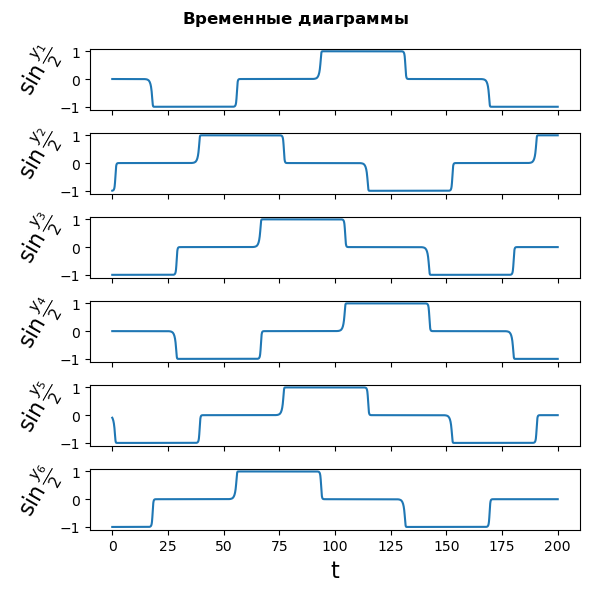

In [18]:
MU.plotTimeSeries(sol, projFunc = MU.projHalfSin)

# Временные диграммы

In [21]:
GU.plotTimeSeries(sol, [GU.projNone, GU.projHalfSin, GU.projLogSin], plot_title, "TS " * ImageName * ImageType, Dict("linewidth" => 1));

UndefVarError: UndefVarError: sol not defined

# Проекции решения

In [177]:
#(fig, ax) = GU.plotProjections(sol, GU.projHalfCos, plot_title, "Proj " * ImageName, Dict("linewidth" => 1, "s" => 0.5), plot_func = "scatter");
#ProjType = GU.projHalfSin
#ProjName = string(ProjType)[20 : findnext(' ', string(ProjType), 20) - 1]
#(fig, ax) = GU.plotProjections(sol, ProjType, plot_title, "Proj " * ProjName * " " * ImageName, Dict("linewidth" => 1));

# Отображение Пуанкаре

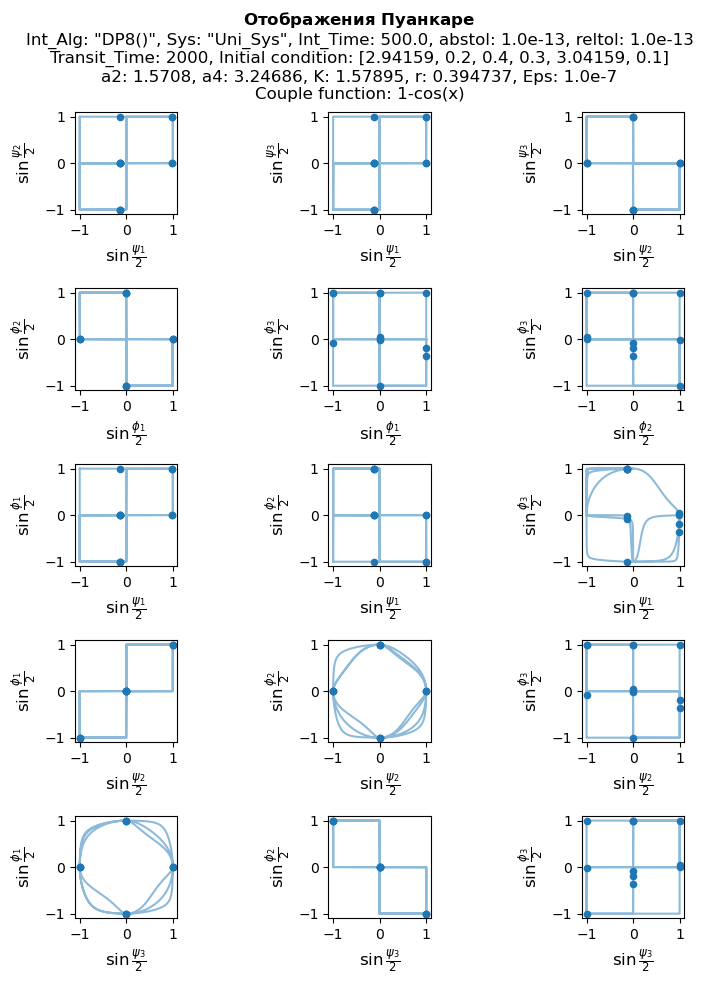

In [178]:
ProjType = GU.projHalfSin
ProjName = string(ProjType)[20 : findnext(' ', string(ProjType), 20) - 1]

(fig, ax) = GU.plotPoincare(sol, ProjType, plot_title, "Poincare " * ImageName * " " * ProjName * ImageType, Dict("linewidth" => 1, "s" => 20));

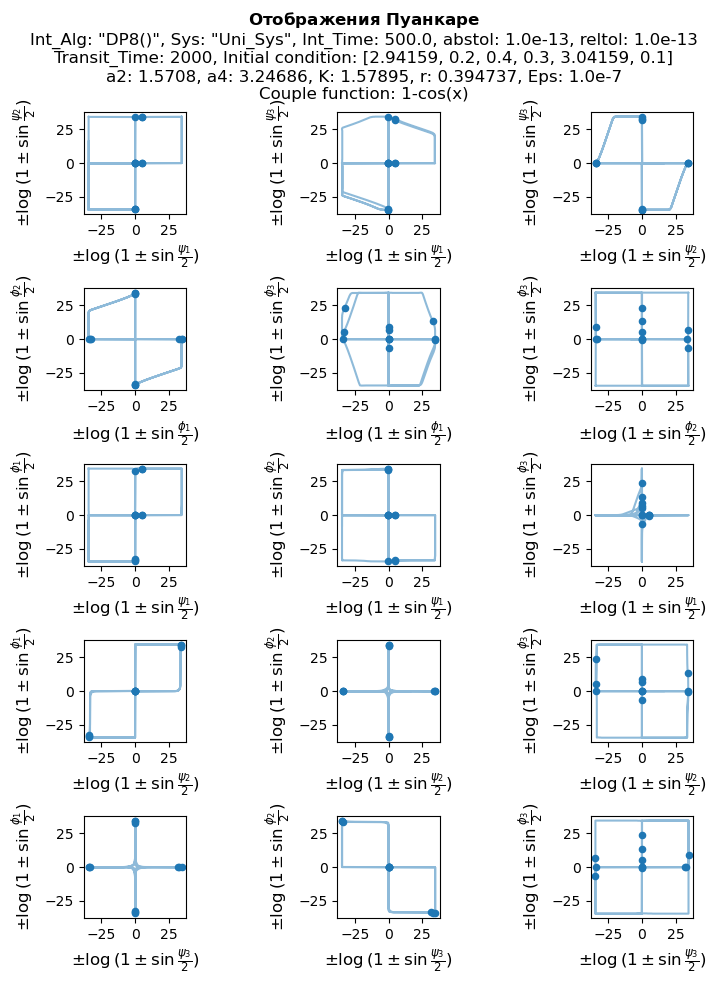

In [179]:
ProjType = GU.projLogSin
ProjName = string(ProjType)[20 : findnext(' ', string(ProjType), 20) - 1]

(fig, ax) = GU.plotPoincare(sol, ProjType, plot_title, "Poincare " * ImageName * " " * ProjName * ImageType, Dict("linewidth" => 1, "s" => 20));

# Время возврата на секущую

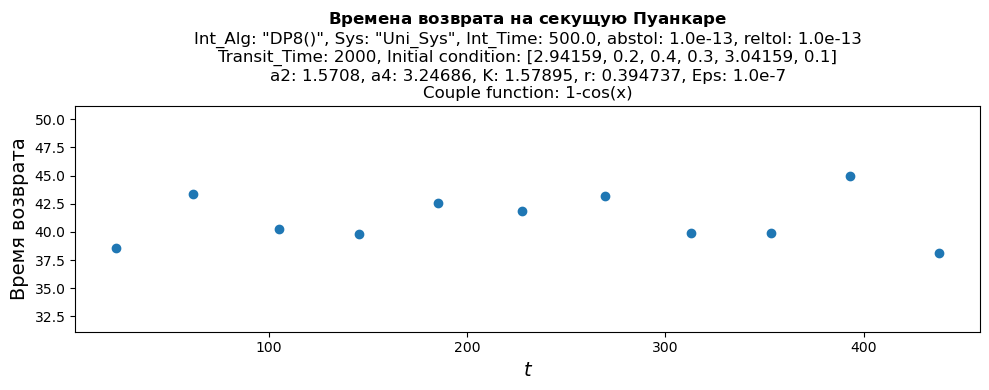

In [180]:
fig = GU.plotreturnTime(sol, GU.normNone, plot_title, "RetTime " * ImageName * ImageType, Dict("color" => "black", "linewidth" => 1, "s" => 0.1));

# Диаграмма активности

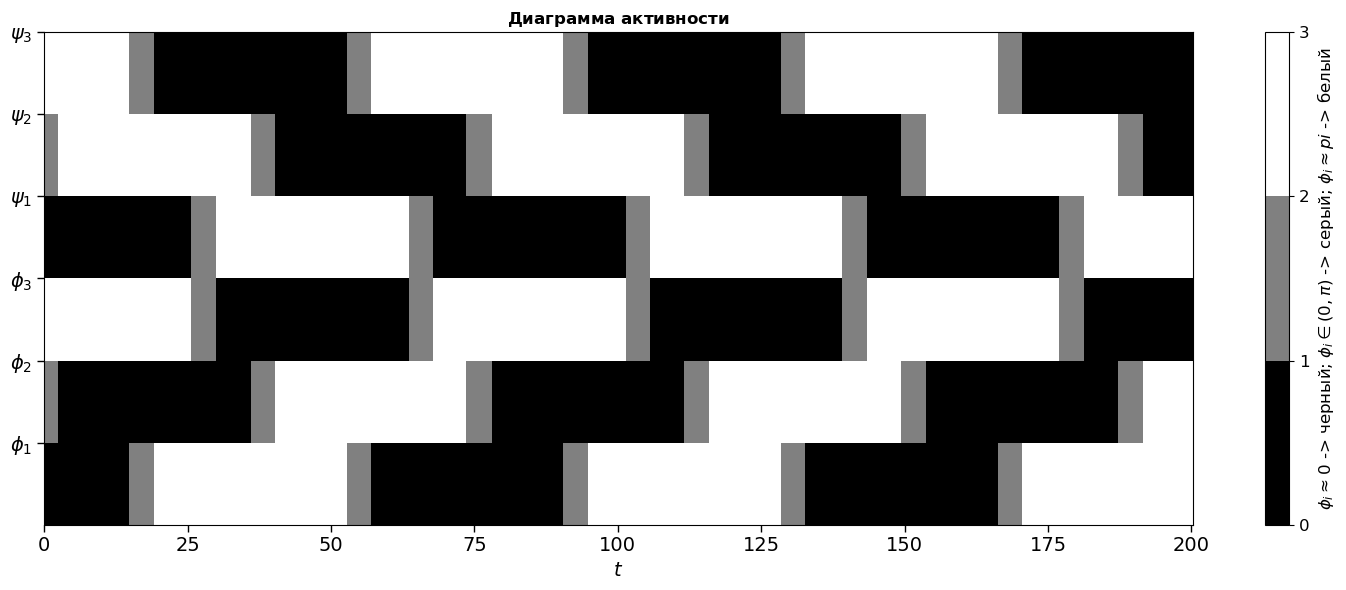

In [25]:
MU.plotActivationDiagram(sol, varNames = ["\\phi_1", "\\phi_2", "\\phi_3", "\\psi_1", "\\psi_2", "\\psi_3"]);

In [13]:
function normArctan(x)
    return atan(sin(x), cos(x))
end

function circleDist(x, y)
    x = normArctan(x)
    y = normArctan(y)
    return min(abs(x - y), 2*pi - abs(x - y))
end

circleDist (generic function with 1 method)

In [14]:
norms = similar(sol.t)

for i = 1 : length(sol.t)
    A = zeros(6, 1)
    for j = 1 : 6
        A[j] = circleDist(sol.y[j][1], sol.y[j][i])
    end
    norms[i] = log10(norm(A))
end

In [15]:
minnorm = norms[50]
minind = 50
for i = 50 : length(norms)
    if norms[i] < minnorm
        minnorm = norms[i]
        minind = i
    end
end

In [16]:
minind

829

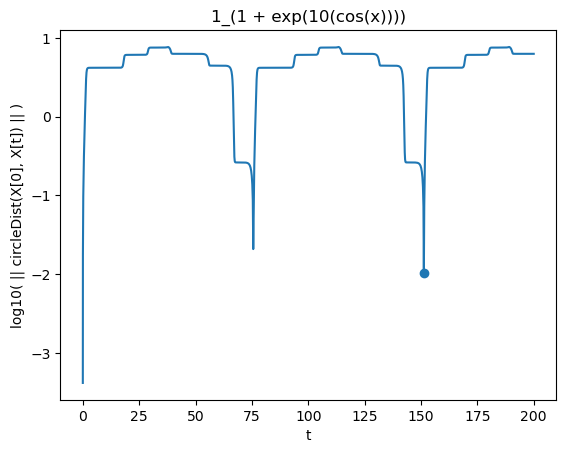

PyObject Text(0.5, 1.0, '1_(1 + exp(10(cos(x))))')

In [17]:
plot(sol.t, norms)
scatter(sol.t[minind], minnorm)
gca().set_xlabel("t")
gca().set_ylabel("log10( || circleDist(X[0], X[t]) || )")
gca().set_title(CoupleFuncName)

# Динамика одиночной системы без связей

In [8]:
time_span = 2000.0
trans_time = 0

0

In [9]:
plot_title = "Int_Alg: \"" * string(alg) * "\", Sys: \"" * string(BS_Sngl_Sys) * "\", Int_Time: " * string(time_span) *
    ", abstol: " * string(abstol) * ", reltol: " * string(reltol) * "\n" *
    "Transit_Time: " * string(trans_time) * ", Initial condition: " * string(sprint(show, startPt[1:3]; context=:compact => true)) * "\n" *
    "a2: " * string(sprint(show, a2; context=:compact => true)) * ", a4: " * string(sprint(show, a4; context=:compact => true)) *
    ", K: " * string(sprint(show, K; context=:compact => true)) * ", r: " * string(sprint(show, r; context=:compact => true)) *
    ", Eps: " * string(sprint(show, Eps; context=:compact => true)) * "\n" *
    "Couple function: None"

ImageName = "1e" * string(convert(Int, log10(Eps)))

"1e-7"

In [10]:
prob_julia = ODEProblem(BS_Sngl_Sys, startPt[1:3], (0.0, 10), [K, a2, a4, r, Eps])
sol_julia = solve(prob_julia, alg = alg, abstol = abstol, reltol = reltol, adaptive=true, dt = dt, maxiters = 1e7,save_everystep=false, progress = true)

retcode: Success
Interpolation: 1st order linear
t: 2-element Vector{Float64}:
  0.0
 10.0
u: 2-element Vector{Vector{Float64}}:
 [2.941592653589793, 0.2, 0.4]
 [2.2404156472247774e-13, 3.141592649054122, 1.9736154677030755]

In [11]:
prob_julia = ODEProblem(BS_Sngl_Sys, startPt[1:3], (0.0, trans_time), [K, a2, a4, r, Eps])
sol_julia = solve(prob_julia, alg = alg, abstol = abstol, reltol = reltol, adaptive=true, dt = dt, maxiters = 1e7,save_everystep=false, progress = true)

cb, observer_array = GetCallBack_Sngl(myCond);
#prob_julia = ODEProblem(func, [p % (2*pi) for p in sol_julia.u[end]], (0.0, time_span), [K, a2, a4, r, Eps])
prob_julia = ODEProblem(BS_Sngl_Sys, sol_julia.u[end], (0.0, time_span), [K, a2, a4, r, Eps])
sol_julia = solve(prob_julia, alg = alg, callback = cb, abstol = abstol, reltol = reltol, adaptive=true, dt = dt, maxiters = 1e7,save_everystep=true, progress = true); sol_julia.retcode

:Success

# Приведение структуры решения Julia к структуре Python

In [12]:
if isempty(observer_array.t)
    sol = jl2pySol(sol_julia, [])
else
    sol = jl2pySol(sol_julia, observer_array)
end

py_sol([0.0, 0.001, 0.007, 0.03429029582872989, 0.0601733780354078, 0.08425345349743724, 0.10649997742399929, 0.13339564299122256, 0.16409639205996723, 0.1994989300379723  …  1987.9372139600723, 1989.3394678067498, 1990.6974287367914, 1992.0989321607005, 1993.4629514761857, 1994.7960369983552, 1996.0871107206235, 1997.3731164386427, 1998.906915010521, 2000.0], [[2.941592653589793, 2.941918128828725, 2.943855722464461, 2.9523549788181565, 2.9599789663535496, 2.966726961289095, 2.972690239525766, 2.9795789014644853, 2.987045188753899, 2.9951707278028414  …  6.2831853071799415, 6.283185307178735, 6.283185307180393, 6.283185307178501, 6.283185307180788, 6.283185307178321, 6.283185307180253, 6.283185307179437, 6.283185307178695, 6.283185307179727], [0.2, 0.20028595267339408, 0.20201541343091617, 0.21017863605944864, 0.21837134503114716, 0.22638990098763165, 0.23414185038222685, 0.24396298020681736, 0.25578980671803314, 0.2702729682411724  …  -3.1415926535897936, -3.1415926535897887, -3.1415

# Временные диграммы

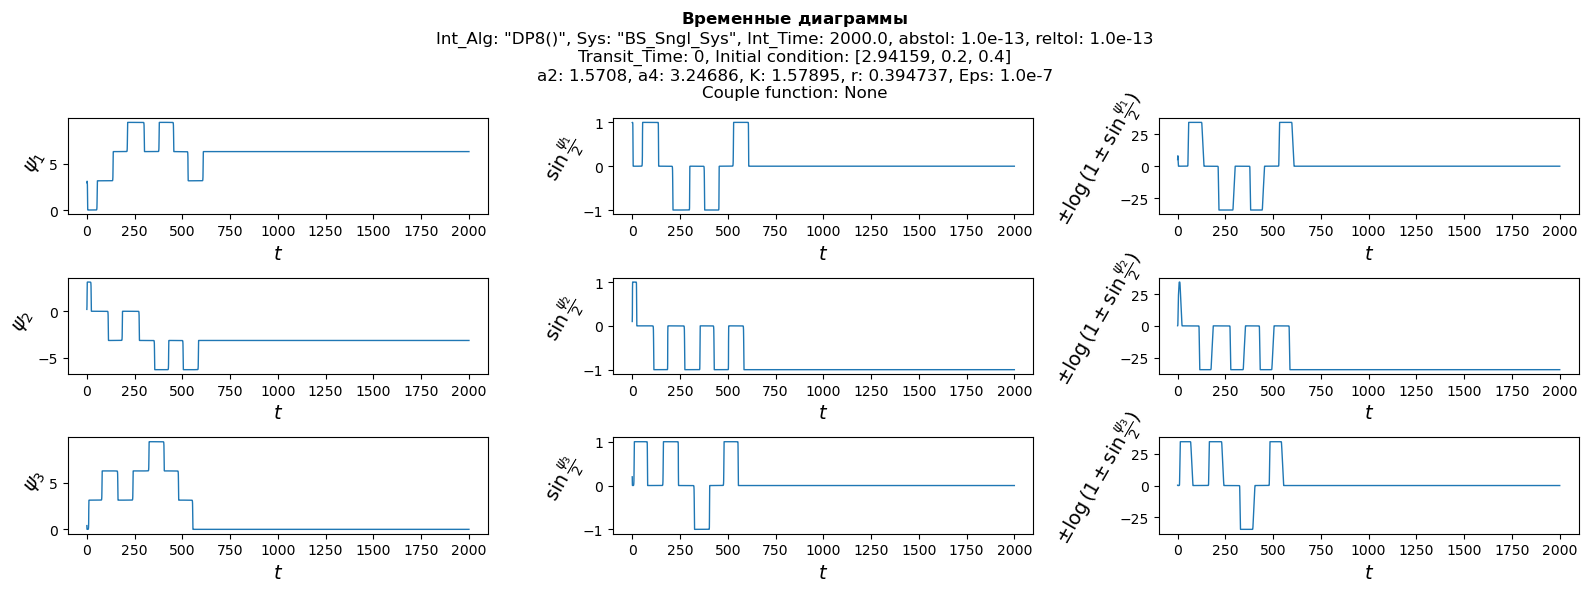

In [13]:
GU.plotTimeSeries(sol, [GU.projNone, GU.projHalfSin, GU.projLogSin], plot_title, "SNGL TS " * ImageName * ImageType, Dict("linewidth" => 1), plot_func = "plot");

# Проекции решения

In [14]:
#(fig, ax) = GU.plotProjections(sol, GU.projHalfCos, plot_title, "Proj " * ImageName, Dict("linewidth" => 1, "s" => 0.5), plot_func = "scatter");
#(fig, ax) = GU.plotProjections(sol, GU.projHalfSin, plot_title, "Proj " * ImageName, Dict("linewidth" => 1));

# Отображение Пуанкаре

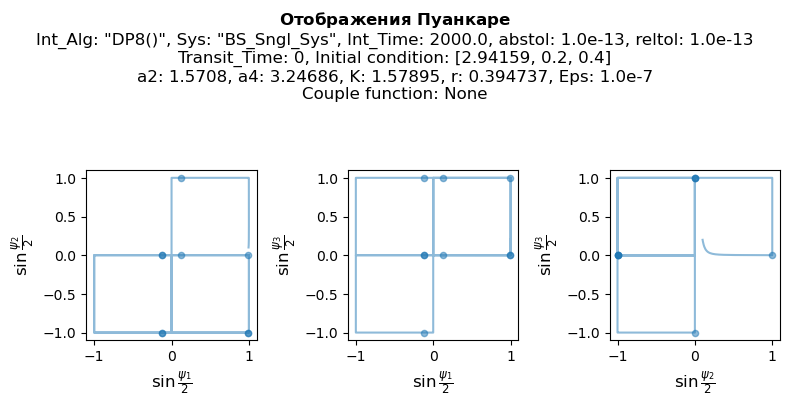

In [15]:
ProjType = GU.projHalfSin
ProjName = string(ProjType)[20 : findnext(' ', string(ProjType), 20) - 1]

(fig, ax) = GU.plotPoincare(sol, ProjType, plot_title, "SNGL Poincare " * ImageName * " " * ProjName * ImageType, Dict("linewidth" => 1, "alpha" => 0.5, "s" => 20));

# Время возврата на секущую

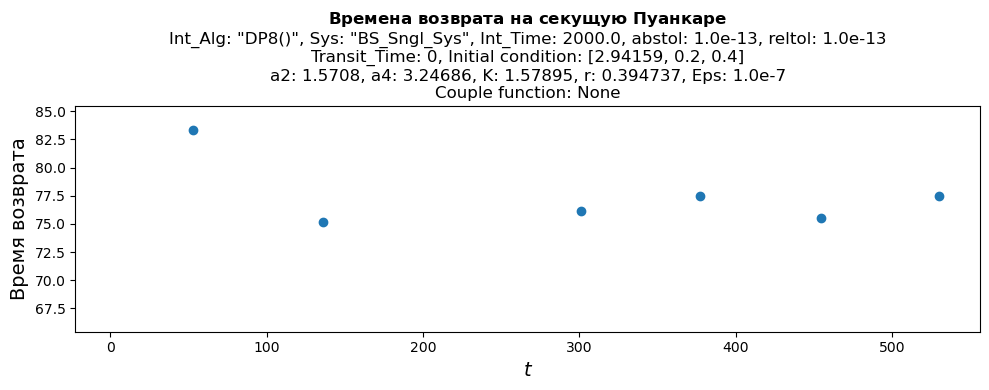

In [79]:
fig = GU.plotreturnTime(sol, GU.normNone, plot_title, "SNGL RetTime " * ImageName * ImageType, Dict("color" => "black", "linewidth" => 1, "s" => 0.1));

# Диаграмма активности

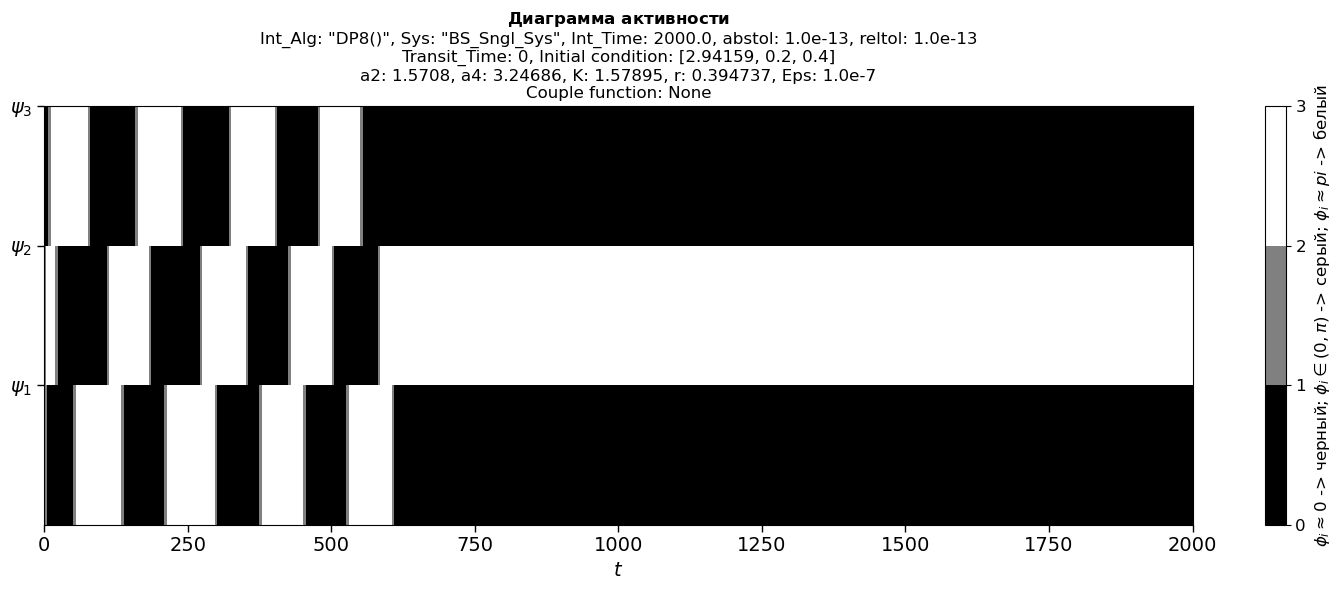

In [80]:
fig = GU.plotActivationDiagram(sol, [L"\psi_1",L"\psi_2",L"\psi_3"], GU.ColorActivation([(0, 0, 0), (0.5, 0.5, 0.5), (1, 1, 1)], GU.normValue), plot_title, "SNGL ActDiag " * ImageName * ImageType);

---

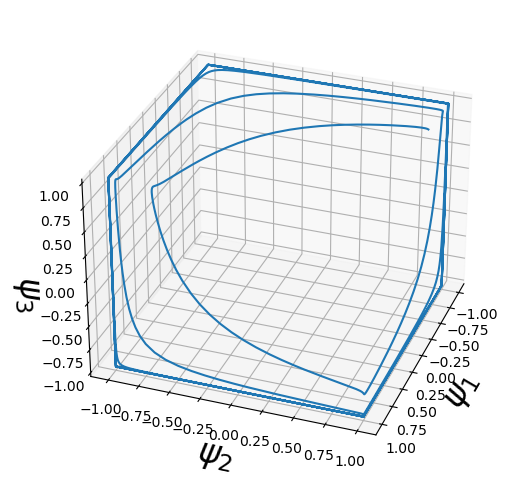

In [233]:
ax = plt.figure(figsize=(6, 6)).add_subplot(projection="3d")


ax.plot(GU.projCos(sol.y[1]), GU.projCos(sol.y[2]), GU.projCos(sol.y[3]))

ax.set_xlabel(L"\psi_1", fontsize=24)
ax.set_ylabel(L"\psi_2", fontsize=24)
ax.set_zlabel(L"\psi_3", fontsize=24)

ax.view_init(30, 20)

# Поиск параметров при которых одиночная система показывает наибольшее число колебаний

In [108]:
func = BS_Sngl_Sys

mesh_hight = 20
mesh_width = 20

K = range(0, 2; length = mesh_width)
r = 0.1
a2 = pi/2
a4 = range(pi, pi + 0.5, length = mesh_hight)

startPt = [pi - 0.2; 0.2; 0.4]

3-element Vector{Float64}:
 2.941592653589793
 0.2
 0.4

In [109]:
Map = zeros(mesh_width, mesh_hight)

for i = 1 : mesh_width
    for j = 1 : mesh_hight
    
        r = K[i] / 4
        prob_julia = ODEProblem(func, startPt, (0.0, time_span), [K[i], a2, a4[j], r])
        cb, observer_array = GetCallBack_Sngl(myCond)
        sol_julia = solve(prob_julia, alg = alg, callback = cb, abstol = abstol, reltol = reltol, adaptive=true, dt = dt, maxiters = 1e7,save_everystep=false)
    
        
        Map[i, j] = length(observer_array.t)
    end
    println(i * mesh_hight, " / ", mesh_width * mesh_hight)
end

20 / 400
40 / 400
60 / 400
80 / 400
100 / 400
120 / 400
140 / 400
160 / 400
180 / 400
200 / 400
220 / 400
240 / 400
260 / 400
280 / 400
300 / 400
320 / 400
340 / 400
360 / 400
380 / 400
400 / 400


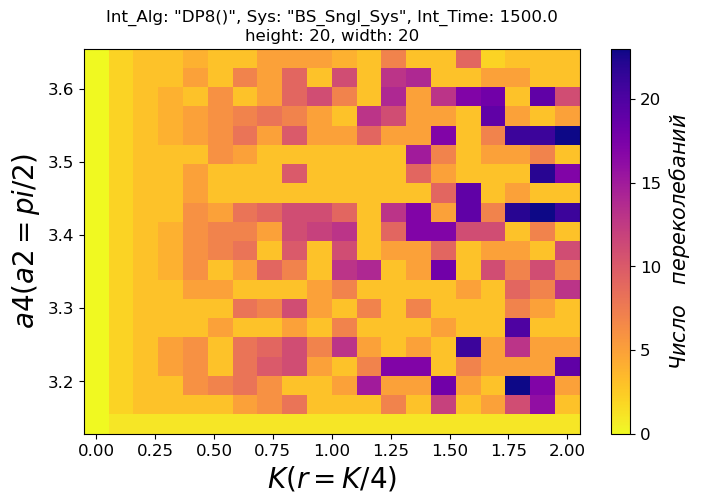

In [110]:
fig = figure(figsize=(8, 5))
cmap = plt.cm.plasma_r

pcm = plt.pcolormesh(K, a4, Map', cmap = cmap, shading="nearest", vmin=minimum(Map), vmax=maximum(Map))
#colorbar(pcm, label = L"min(-\frac{\lambda_1^{DSS}}{\lambda_2^{DSS}}, -\frac{\lambda_3^{DDS}}{\lambda_1^{DDS}})")
cbar = colorbar(pcm)
cbar.ax.tick_params(labelsize=12) 

cbar.set_label(label = L"Число~~~переколебаний", size=15) 

title("Int_Alg: \"" * string(alg) * "\", Sys: \"" * string(func) * "\", Int_Time: " * string(time_span) * "\n" *
    "height: " * string(mesh_hight) * ", width: " * string(mesh_width));

plt.xlabel(L"$K (r = K / 4)$", fontsize=20)
plt.ylabel(L"$a4 (a2 = pi / 2)$", fontsize=20)

plt.xticks(fontsize=12);
plt.yticks(fontsize=12);

In [26]:
POI = []
Border = 10

for i = 1 : mesh_width
    for j = 1 : mesh_hight
        if Map[i, j] > Border
            push!(POI, [i, j])
        end
    end
end

LoadError: UndefVarError: mesh_width not defined

In [27]:
for i = 1 : length(POI)
    println(string(K[POI[i][1]]) * " " * string(a4[POI[i][2]]))
end

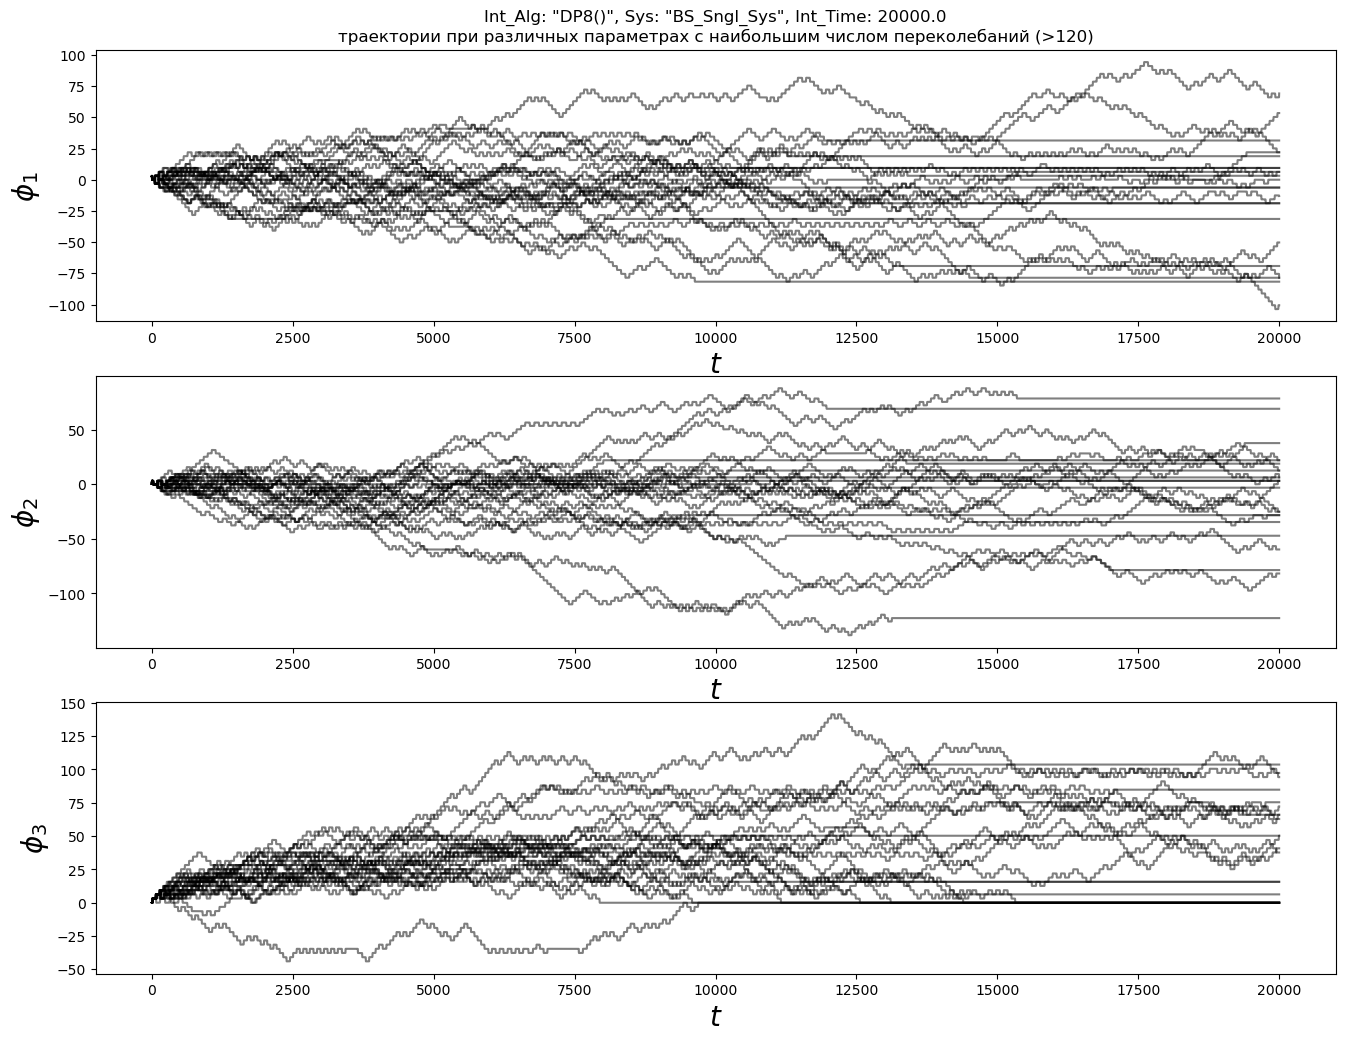

PyObject Text(50.874999999999986, 0.5, '$\\phi_3$')

In [35]:
(fig, ax) = plt.subplots(figsize=(16, 12), nrows=3)

ax[1].set_title("Int_Alg: \"" * string(alg) * "\", Sys: \"" * string(func) * "\", Int_Time: " * string(time_span) * "\n" *
    "траектории при различных параметрах с наибольшим числом переколебаний (>" * string(Border) * ")");

for indexPOI = 1 : length(POI)
    prob_julia = ODEProblem(func, startPt, (0.0, time_span), [K[POI[indexPOI][1]], a2, a4[POI[indexPOI][2]], K[POI[indexPOI][1]]/4])
    cb, observer_array = GetCallBack_Sngl(myCond)
    sol_julia = solve(prob_julia, alg = alg, callback = cb, abstol = abstol, reltol = reltol, adaptive=true, dt = dt, maxiters = 1e7,save_everystep=true); sol_julia.retcode
    if isempty(observer_array.t)
        sol = jl2pySol(sol_julia, [])
    else
        sol = jl2pySol(sol_julia, observer_array)
    end
    
    ax[1].plot(sol.t, sol.y[1], alpha = 0.5, color = "black");
    ax[2].plot(sol.t, sol.y[2], alpha = 0.5, color = "black");
    ax[3].plot(sol.t, sol.y[3], alpha = 0.5, color = "black");
end

ax[1].set_xlabel(L"$t$", fontsize=20)
ax[1].set_ylabel(L"$\phi_1$", fontsize=20)

ax[2].set_xlabel(L"$t$", fontsize=20)
ax[2].set_ylabel(L"$\phi_2$", fontsize=20)

ax[3].set_xlabel(L"$t$", fontsize=20)
ax[3].set_ylabel(L"$\phi_3$", fontsize=20)

In [17]:
indexPOI = 1
#prob_julia = ODEProblem(func, startPt, (0.0, time_span), [K[POI[indexPOI][1]], a2, a4[POI[indexPOI][2]], K[POI[indexPOI][1]]/4])
prob_julia = ODEProblem(func, startPt, (0.0, time_span), [K[POI[indexPOI][1]], a2, a4[POI[indexPOI][2]], K[POI[indexPOI][1]]/4])
cb, observer_array = GetCallBack_Sngl(myCond)
sol_julia = solve(prob_julia, alg = alg, callback = cb, abstol = abstol, reltol = reltol, adaptive=true, dt = dt, maxiters = 1e7,save_everystep=true); sol_julia.retcode

:Success

In [18]:
if isempty(observer_array.t)
    sol = jl2pySol(sol_julia, [])
else
    sol = jl2pySol(sol_julia, observer_array)
end

py_sol([0.0, 0.001, 0.007, 0.043000000000000003, 0.1362976775978442, 0.22186440021506176, 0.30204589691186445, 0.3803294535804076, 0.4578154799146717, 0.5350300618255278  …  9993.18377484206, 9993.480644326964, 9993.822135501741, 9994.222207292703, 9994.70212390802, 9995.296890066778, 9996.072585241214, 9997.188829090015, 9999.249226799764, 10000.0], [[2.8415926535897933, 2.8420012977129883, 2.844441399491559, 2.8586646020963156, 2.8923380622296744, 2.9194440051342947, 2.9418222973272488, 2.9610577763381425, 2.9777285221940324, 2.992139812235081  …  -37.699237517675655, -37.699145029934826, -37.69911901715306, -37.69911303558136, -37.69911198163879, -37.699111852694855, -37.69911184336579, -37.69911184306073, -37.69911184407049, -37.699111843111055], [0.3, 0.3004313676561724, 0.30303495919564477, 0.3192235168777349, 0.3660674195784599, 0.41610108345355723, 0.470250265959978, 0.5311607993774882, 0.6007897251411717, 0.6813059838706529  …  -28.27433388230813, -28.274333882308138, -28.2743

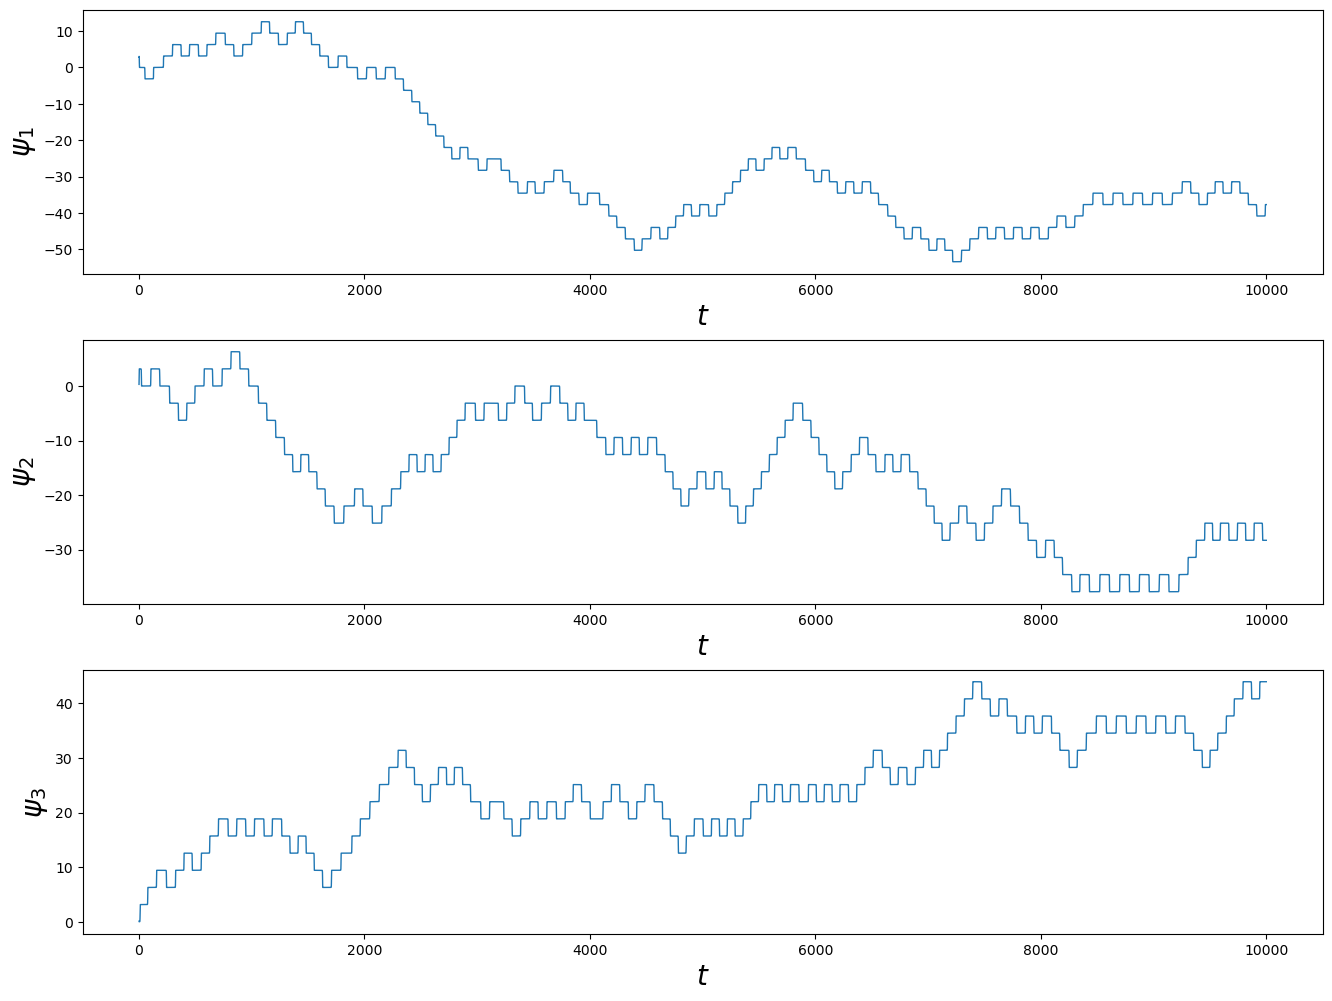

In [26]:
GU.plotTimeSeries(sol, GU.projNone, "tst-stuff.png", Dict([("linewidth", 1)]))

# Проекции решения

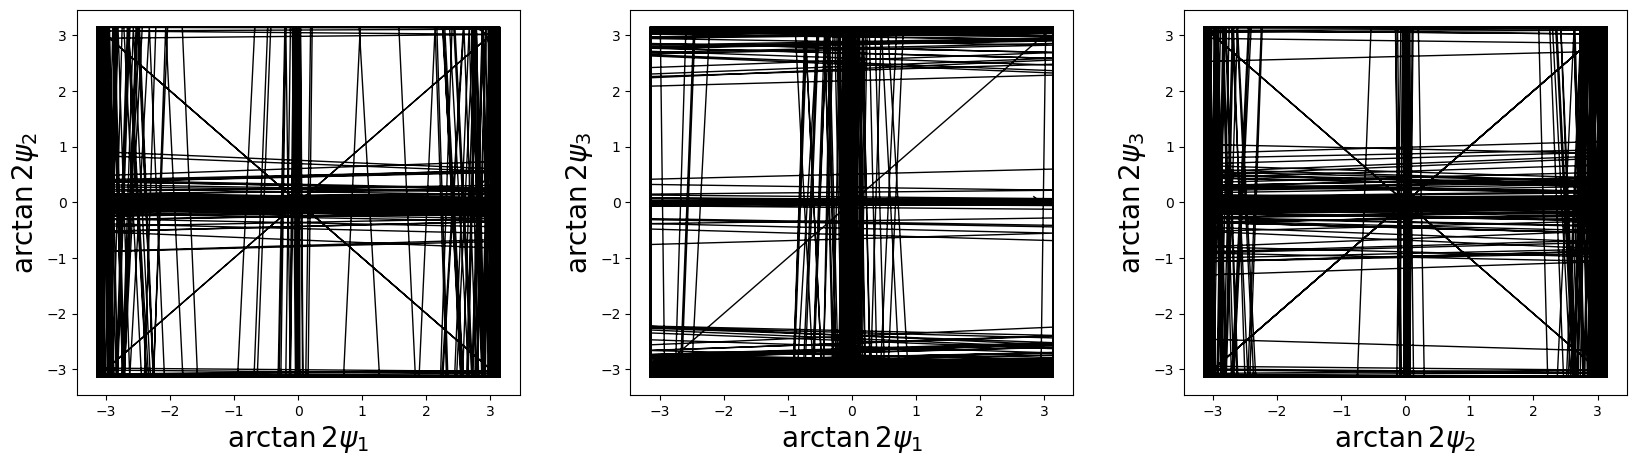

In [32]:
GU.plotProjections(sol, GU.projArctan2, "tst-stuff.png", Dict("color" => "black", "linewidth" => 1))

# Диаграмма активности

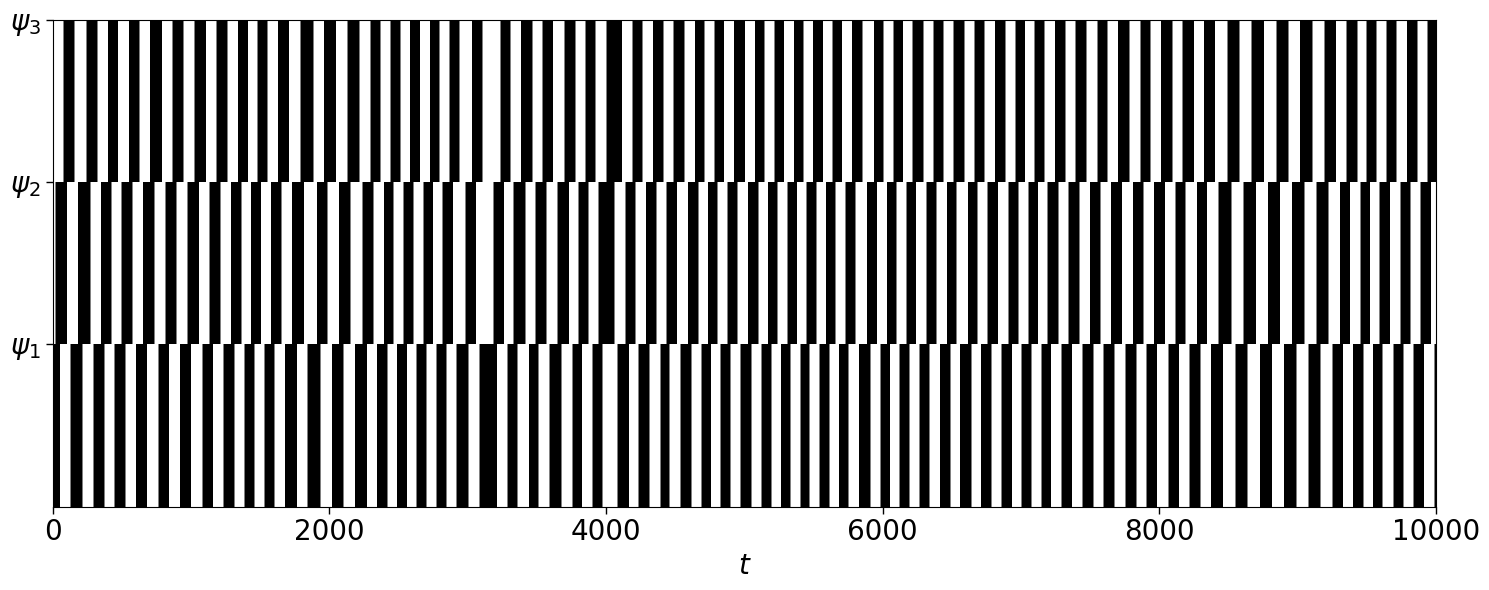

In [33]:
GU.plotActivationDiagram(sol, [L"\psi_1",L"\psi_2",L"\psi_3"], GU.ColorActivation([(0, 0, 0), (0.5, 0.5, 0.5), (1, 1, 1)], GU.normValue), "tst-stuff.png");